In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot
from owslib.wcs import WebCoverageService

In [ ]:
wcs = WebCoverageService('https://maps.isric.org/mapserv?map=/map/ocd.map',
                         version='2.0.1')
crs = "http://www.opengis.net/def/crs/EPSG/0/152160"

In [24]:
# cov_id = 'ocd_0-5cm_mean'
# ocd_0_5 = wcs.contents[cov_id]
# ocd_0_5.supportedFormats
# # subsets = [('X', -1784000, -1140000), ('Y', 1356000, 1863000)]
# subsets = [('X', -31224525.496483717,-29051817.460690156), ('Y', 8503557.09372575, 10664841.908867057)]


# response = wcs.getCoverage(
#     identifier=[cov_id], 
#     crs=crs,
#     subsets=subsets, 
#     resx=250, resy=250, 
#     format=ocd_0_5.supportedFormats[0])

# with open('./data/output.tif', 'wb') as file:
#     file.write(response.read())

In [25]:

# ocd = rasterio.open("./data/output.tif", driver="GTiff")
# %matplotlib inline
# plot.show(ocd, title='Mean OCD between 0 and 5 cm deep in Senegal', cmap='gist_ncar')

variable_name: Organic carbon densities
variable_units: hg/dm3
service_url: https://maps.isric.org/mapserv?map=/map/ocd.map
service_id: ocd
coverage_id: ocd_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::152160
bounding_box: (-1784000, 1356000, -1140000, 1863000)
grid_res: [250, 250]


Text(0.5, 1.0, 'Mean pH between 0 and 5 cm soil depth in Senegal')

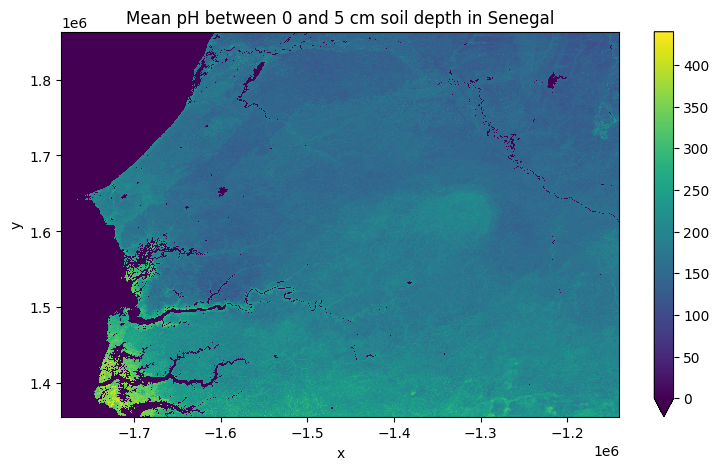

In [26]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(
    service_id="ocd",
    coverage_id="ocd_0-5cm_mean",
    west=-1784000,
    south=1356000,
    east=-1140000,
    north=1863000,
    crs="urn:ogc:def:crs:EPSG::152160",
    output="test.tif",
)

# show metadata
for key, value in soil_grids.metadata.items():
    print(f"{key}: {value}")


# plot data
data.plot(figsize=(9, 5), vmin=0)
plt.title("Mean pH between 0 and 5 cm soil depth in Senegal")

Width: 316, Height: 216
variable_name: Organic carbon densities
variable_units: hg/dm3
service_url: https://maps.isric.org/mapserv?map=/map/ocd.map
service_id: ocd
coverage_id: ocd_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-73.96421, 46.3496, -70.8034, 48.51856)
grid_res: [0.010002563291139192, 0.010041481481481483]


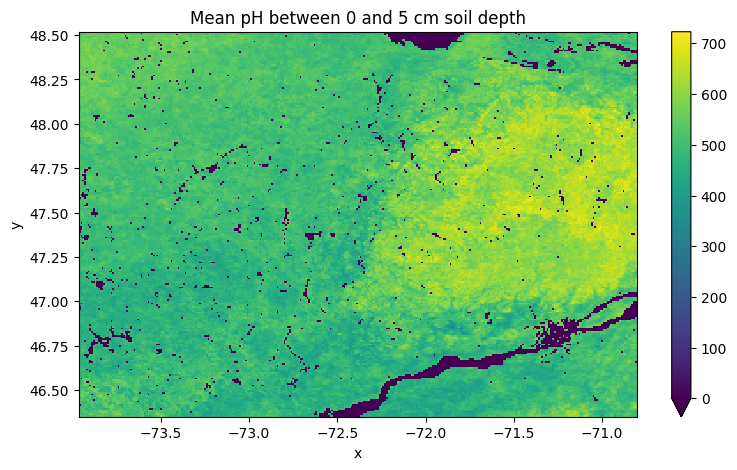

In [28]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# Define the geographic bounding box and resolution
west, south, east, north = -73.96421, 46.34960, -70.80340, 48.51856
resx, resy = 0.01, 0.01  # Resolution in degrees

# Calculate width and height
width = int((east - west) / resx)
height = int((north - south) / resy)

print(f"Width: {width}, Height: {height}")

# Get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(
    service_id="ocd",
    coverage_id="ocd_0-5cm_mean",
    west=west,
    south=south,
    east=east,
    north=north,
    crs="urn:ogc:def:crs:EPSG::4326",
    width=width,
    height=height,
    output="test.tif",
)

# Show metadata
for key, value in soil_grids.metadata.items():
    print(f"{key}: {value}")

# Plot data
data.plot(figsize=(9, 5), vmin=0)
plt.title("Mean pH between 0 and 5 cm soil depth")
plt.show()

